In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression

# Mount google drive to get acess to data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Link to Data

Click down below to view the data on Kaggle

[IBM HR Data](https://www.kaggle.com/datasets/rushikeshghate/capstone-projectibm-employee-attrition-prediction?select=IBM+HR+Data+new.csv)


#Graph formatting

In [6]:
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25
# Set font sizes individually. For example, you may want the title
# to be very big, but the axes labels to be only medium size.
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


#Loading Data & Cleaning

In [7]:
# Load dataframe and save it as a variable 'df'
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of IBM HR Data new.csv')
# Look at df
df.head()

<ipython-input-7-5430989431de>:2: DtypeWarning: Columns (5,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of IBM HR Data new.csv')


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


##Look for None/NaN Values

In [8]:
# Sum up the None/NaN values within each column
df.isna().sum()

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   12
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EmployeeNumber               1
Application ID               3
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               13
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtC

In [9]:
# Check for None/NaN values within df
# Print out column name and the amount of None/NaN values and the percentage of None/NaN values in each column
for col in df.columns:
    print(f'{col}: {df[col].isna().sum()} ({100 * df[col].isna().sum() / df.shape[0]}%)')

Age: 3 (0.012800819252432157%)
Attrition: 13 (0.05547021676053934%)
BusinessTravel: 8 (0.034135518006485746%)
DailyRate: 12 (0.051203277009728626%)
Department: 11 (0.0469363372589179%)
DistanceFromHome: 9 (0.03840245775729647%)
Education: 12 (0.051203277009728626%)
EducationField: 9 (0.03840245775729647%)
EmployeeCount: 5 (0.021334698754053593%)
EmployeeNumber: 1 (0.004266939750810718%)
Application ID: 3 (0.012800819252432157%)
EnvironmentSatisfaction: 9 (0.03840245775729647%)
Gender: 10 (0.042669397508107186%)
HourlyRate: 9 (0.03840245775729647%)
JobInvolvement: 9 (0.03840245775729647%)
JobLevel: 7 (0.02986857825567503%)
JobRole: 9 (0.03840245775729647%)
JobSatisfaction: 9 (0.03840245775729647%)
MaritalStatus: 11 (0.0469363372589179%)
MonthlyIncome: 13 (0.05547021676053934%)
MonthlyRate: 11 (0.0469363372589179%)
NumCompaniesWorked: 9 (0.03840245775729647%)
Over18: 10 (0.042669397508107186%)
OverTime: 12 (0.051203277009728626%)
PercentSalaryHike: 14 (0.05973715651135006%)
PerformanceRa

In [10]:
# Drop rows that have None/NaN within it
df = df.dropna()

In [11]:
# Print out what kind of values are within each column (float, object, string, etc...)
df.dtypes

Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome             object
Education                   float64
EducationField               object
EmployeeCount                object
EmployeeNumber               object
Application ID               object
EnvironmentSatisfaction     float64
Gender                       object
HourlyRate                   object
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction              object
MaritalStatus                object
MonthlyIncome                object
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike            object
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               

##Converting Columns that have values of Objects

Columns to be converted:
- Attrition X
- BusinessTravel (get_dummies)
- Department (get_dummies)
- DistanceFromHome X
- EducationField (get_dummies)
- EmployeeCount (Dropped)
- EmployeeNumber (Dropped)
- Application ID (Dropped)
- Gender X
- HourlyRate X
- JobRole (get_dummies)
- JobSatisfaction X
- MaritalStatus (get_dummies)
- MonthlyIncome X
- Over18 (Dropped)
- OverTime X
- PercentSalaryHike X
- Employee Source

###Converting 'Attrition' Column

- Volunatry Resignation = 1
- Current employee = 0

In [12]:
# Print out the different values within the 'Attrition' colummn
print(df['Attrition'].unique())

['Voluntary Resignation' 'Current employee']


In [13]:
# Import LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
# Create a map that converts values within a column
# 'Voluntary Resignation' will be converted to 1
# 'Current employee' will be converted to 0
attrition_map = {'Voluntary Resignation': 1, 'Current employee': 0}

In [16]:
# Change the values of column 'Attrition' based off attrition_map
df['Attrition'] = df['Attrition'].map(attrition_map)

<ipython-input-16-0e0223f4ea79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attrition'] = df['Attrition'].map(attrition_map)


In [17]:
# Sanity check to see if previous code worked 
print(df['Attrition'].unique())

[1 0]


In [18]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [19]:
# Print out the number of employees that are still employeed with the compnay
print("The Number of Employees that stayed with the company: ",sum(df['Attrition']==0))
# print out the number of employees that have left the company
print("The Number of Employees that left the company: ",sum(df['Attrition']==1))

The Number of Employees that stayed with the company:  19530
The Number of Employees that left the company:  3674


###Converting 'BusinessTravel' Column into Seperate Columns

Use get_dummies

In [20]:
# Print out the values within the 'BusinessTravel' column
print(df['BusinessTravel'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


In [21]:
# Dummy variable encode categorical variables with more than two unique values
df = pd.concat([df, pd.get_dummies(df['BusinessTravel'])], axis=1)

In [22]:
# Drop 'BusinessTravel' Column
df = df.drop(columns=['BusinessTravel'])

In [23]:
# Sanity Check to see if Columns are there
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'Application ID', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Employee Source', 'Non-Travel',
       'Travel_Frequently', 'Travel_Rarely'],
      dtype='object')

###Converting 'Department' Column into Seperate Columns

Use get_dummies

In [24]:
# Print out the values within the 'Department' column
print(df['Department'].unique())

['Sales' 'Research & Development' 'Human Resources']


In [25]:
# Dummy variable encode categorical variables with more than two unique values
df = pd.concat([df, pd.get_dummies(df['Department'], prefix='Department')], axis=1)

In [26]:
# Drop 'Department' Column
df = df.drop(columns=['Department'])

In [27]:
# Sanity Check to see if Columns are there
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'EmployeeNumber', 'Application ID',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Employee Source', 'Non-Travel',
       'Travel_Frequently', 'Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales'],
      dtype='object')

###Converting 'DistanceFromHome' Column value

Convert values within column from objects to floats

In [28]:
# Print out the values within the 'DistanceFromHome' column
print(df['DistanceFromHome'].unique())

['1' '12' '20' '2' '4' '5' '22' '3' '10' '9' '14' '6' '19' '7' '23' '28'
 '8' '18' '11' '21' '25' '16' '13' '24' '27' '15' '26' '29' '17' 21.0 5.0
 10.0 9.0 23.0 1.0 2.0 15.0 29.0 27.0 3.0 4.0 26.0 14.0 16.0 22.0 18.0 6.0
 12.0 25.0 24.0 20.0 7.0 8.0 17.0 28.0 11.0 19.0 13.0]


In [29]:
# Convert 'DistanceFromHome' column from object to numeric
df['DistanceFromHome'] = df['DistanceFromHome'].apply(pd.to_numeric)

In [30]:
# Sanity Check to see if the column type changed
df['DistanceFromHome'].dtypes

dtype('float64')

###Converting 'EducationField' Column into Seperate Columns

Use get_dummies

In [31]:
# Print out the values within the 'EducationField' column
print(df['EducationField'].unique())

['Life Sciences' 'Technical Degree' 'Medical' 'Marketing' 'Other'
 'Human Resources' 'Test']


In [32]:
# Dummy variable encode categorical variables with more than two unique values
df = pd.concat([df, pd.get_dummies(df['EducationField'], prefix='Education')], axis=1)

In [33]:
# Drop 'EducationField' Column
df = df.drop(columns=['EducationField'])

In [34]:
# Sanity Check to see if Columns are there
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'Application ID',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Employee Source', 'Non-Travel',
       'Travel_Frequently', 'Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'Education_Human Resources', 'Education_Life Sciences',
       'Education_Marketing', 'Education_Medical', 'Education_Other',
       'Education_Technical Degree', 'E

###Drop 'EmployeeCount' Column

Drop this column because the values within it are only 1

In [35]:
# Print out the values within the 'EmployeeCount' column
print(df['EmployeeCount'].unique())

['1' 1]


In [36]:
# Drop column named 'EmployeeCount'
df = df.drop('EmployeeCount', axis=1)

###Drop 'EmployeeNumber' Column

EmployeeNumber column dropped because it doesn't serve a purpose other than numbering the employees

In [37]:
# Print out the values within the 'EmployeeNumber' column
print(df['EmployeeNumber'].unique())

['1' '7' '8' ... '19340' '19344' '19345']


In [38]:
# Drop column named 'EmployeeNumber'
df = df.drop('EmployeeNumber', axis=1)

###Drop 'Application ID' Column

ApplicationNumber column dropped becuase it doesn't serve a purpose other than numbering the employees applications

In [39]:
# Print out the values within the 'Application ID' column
print(df['Application ID'].unique())

['123456' '123458' '123462' ... 142795.0 142799.0 142800.0]


In [40]:
# Drop column named 'Application ID'
df = df.drop('Application ID', axis=1)

###Converting 'Gender' Column value

- Female = 0
- Male = 1

In [41]:
# Print out the values within the 'Gender' column
print(df['Gender'].unique())

['Female' 'Male']


In [42]:
# Create a map that converts values within a column
# 'Female' will be converted to 0
# 'Male' will be converted to 1
gender_map = {'Female': 0, 'Male': 1}

In [43]:
# Change the values of column 'Gender' based off gender_map
df['Gender'] = df['Gender'].map(gender_map)

In [44]:
# Sanity check to see if previous code worked 
print(df['Gender'].unique())

[0 1]


In [45]:
# Print out the number of employees that are Female
print("The Number of Employees that are Females: ",sum(df['Gender']==0))
# print out the number of employees that are Males
print("The Number of Employees that are Males: ",sum(df['Gender']==1))

The Number of Employees that are Females:  9290
The Number of Employees that are Males:  13914


###Converting 'HourlyRate' Column value

Convert values within column from objects to floats

In [46]:
# Print out the values within the 'HourlyRate' column
print(df['HourlyRate'].unique())

['94' '33' '41' '39' '49' '70' '50' '56' '54' '66' '57' '65' '82' '95'
 '87' '37' '81' '80' '38' '42' '43' '96' '91' '44' '45' '46' '75' '36'
 '88' '52' '53' '62' '60' '73' '59' '61' '64' '55' '71' '72' '77' '32'
 '40' '90' '84' '85' '76' '35' '93' '31' '98' '34' '92' '63' '51' '89'
 '58' '30' '100' '47' '83' '48' '69' '67' '68' '74' '78' '79' '86' '97'
 '99']


In [47]:
# Convert 'HourlyRate' column from object to numeric
df['HourlyRate'] = df['HourlyRate'].apply(pd.to_numeric)

In [48]:
# Sanity Check to see if the column type changed
df['HourlyRate'].dtypes

dtype('int64')

###Converting 'JobRole' Column into Seperate Columns

Use get_dummies

In [49]:
# Print out the values within the 'JobRole' column
print(df['JobRole'].unique())

['Sales Executive' 'Manager' 'Research Director' 'Sales Representative'
 'Laboratory Technician' 'Research Scientist' 'Manufacturing Director'
 'Healthcare Representative' 'Human Resources']


In [50]:
# Dummy variable encode categorical variables with more than two unique values
df = pd.concat([df, pd.get_dummies(df['JobRole'], prefix='JobRole')], axis=1)

In [51]:
# Drop 'JobRole' Column
df = df.drop(columns=['JobRole'])

In [52]:
# Sanity Check to see if Columns are there
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Employee Source', 'Non-Travel', 'Travel_Frequently', 'Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'Education_Human Resources',
       'Education_Life Sciences', 'Education_Marketing', 'Education_Medical',
       'Education_Other', 'Education_Technical Degree', 'Education_Test',
       'JobRole_Healthcare Representative', 'JobRole_Human Res

###Converting 'JobSatisfaction' Column value

Convert values within column from objects to floats

In [53]:
# Print out the values within the 'JobSatisfaction' column
print(df['JobSatisfaction'].unique())

['4' '3' '1' '2']


In [54]:
# Convert 'JobSatisfaction' column from object to numeric
df['JobSatisfaction'] = df['JobSatisfaction'].apply(pd.to_numeric)

In [55]:
# Sanity Check to see if the column type changed
df['JobSatisfaction'].dtypes

dtype('int64')

###Converting 'MaritalStatus' Column into Seperate Columns

Use get_dummies

In [56]:
# Print out the values within the 'MaritalStatus' column
print(df['MaritalStatus'].unique())

['Single' 'Divorced' 'Married']


In [57]:
# Dummy variable encode categorical variables with more than two unique values
df = pd.concat([df, pd.get_dummies(df['MaritalStatus'])], axis=1)

In [58]:
# Drop 'MaritalStatus' Column
df = df.drop(columns=['MaritalStatus'])

In [59]:
# Sanity Check to see if Columns are there
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Employee Source',
       'Non-Travel', 'Travel_Frequently', 'Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'Education_Human Resources',
       'Education_Life Sciences', 'Education_Marketing', 'Education_Medical',
       'Education_Other', 'Education_Technical Degree', 'Education_Test',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       '

###Converting 'MonthlyIncome' Column value

Convert values within column from objects to floats

In [60]:
# Print out the values within the 'MonthlyIncome' column
print(df['MonthlyIncome'].unique())

['5993' '14756' '19566' ... '3537' '14336' '13549']


In [61]:
# Convert 'MonthlyIncome' column from object to numeric
df['MonthlyIncome'] = df['MonthlyIncome'].apply(pd.to_numeric)

In [62]:
# Sanity Check to see if the column type changed
df['MonthlyIncome'].dtypes

dtype('int64')

###Drop 'Over18' Column

Drop Over18 column since there is only 1 value within this column therefore it will not tell us anything since everyone is over 18 within the dataset. 

In [63]:
# Print out the values within the 'Over18' column
print(df['Over18'].unique())

['Y']


In [64]:
# Drop column named 'Over18'
df = df.drop('Over18', axis=1)

###Converting 'OverTime' Column value

Convert values within column from objects to floats

In [65]:
# Print out the values within the 'OverTime' column
print(df['OverTime'].unique())

['Yes' 'No']


In [66]:
# Create a map that converts values within a column
# 'No' will be converted to 0
# 'Yes' will be converted to 1
overtime_map = {'No': 0,
              'Yes': 1}

In [67]:
# Change the values of column 'OverTime' based off overtime_map
df['OverTime'] = df['OverTime'].map(overtime_map)

In [68]:
# Sanity check to see if previous code worked 
print(df['OverTime'].unique())

[1 0]


In [69]:
# Print out the number of employees that do not clock Overtime
print("The Number of Employees that do not clock Overtime: ",sum(df['OverTime']==0))
# print out the number of employees that do clock Overtime
print("The Number of Employees that do clock Overtime: ",sum(df['OverTime']==1))

The Number of Employees that do not clock Overtime:  16633
The Number of Employees that do clock Overtime:  6571


###Converting 'PercentSalaryHike' Column value

Convert values within column from objects to floats

In [70]:
# Print out the values within the 'PercentSalaryHike' column
print(df['PercentSalaryHike'].unique())

['11' '14' '12' '22' '18' '13' '17' '23' '20' '19' '16' '15' '21' '24'
 '25']


In [71]:
# Convert 'PercentSalaryHike' column from object to numeric
df['PercentSalaryHike'] = df['PercentSalaryHike'].apply(pd.to_numeric)

In [72]:
# Sanity Check to see if the column type changed
df['PercentSalaryHike'].dtypes

dtype('int64')

###Converting 'Employee Source' Column into Seperate Columns

Use get_dummies

In [73]:
# Print out the values within the 'Employee Source' column
print(df['Employee Source'].unique())

['Referral' 'Company Website' 'Indeed' 'GlassDoor' 'LinkedIn' 'Adzuna'
 'Seek' 'Recruit.net' 'Jora' 'Test']


In [74]:
# Dummy variable encode categorical variables with more than two unique values
df = pd.concat([df, pd.get_dummies(df['Employee Source'], prefix='EmployeeScource')], axis=1)

In [75]:
# Drop 'Employee Source' Column
df = df.drop(columns=['Employee Source'])

In [76]:
# Sanity Check to see if Columns are there
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Non-Travel',
       'Travel_Frequently', 'Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'Education_Human Resources', 'Education_Life Sciences',
       'Education_Marketing', 'Education_Medical', 'Education_Other',
       'Education_Technical Degree', 'Education_Test',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician

### Check to see if Columns have been corrected

Check if Columns are no longer objects

In [77]:
# Print out what kind of values are within each column (float, object, string, etc...)
df.dtypes

Age                            float64
Attrition                        int64
DailyRate                      float64
DistanceFromHome               float64
Education                      float64
                                ...   
EmployeeScource_LinkedIn         uint8
EmployeeScource_Recruit.net      uint8
EmployeeScource_Referral         uint8
EmployeeScource_Seek             uint8
EmployeeScource_Test             uint8
Length: 62, dtype: object

# View Cleaned Data

In [78]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,EmployeeScource_Adzuna,EmployeeScource_Company Website,EmployeeScource_GlassDoor,EmployeeScource_Indeed,EmployeeScource_Jora,EmployeeScource_LinkedIn,EmployeeScource_Recruit.net,EmployeeScource_Referral,EmployeeScource_Seek,EmployeeScource_Test
0,41.0,1,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,...,0,0,0,0,0,0,0,1,0,0
1,41.0,1,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,...,0,0,0,0,0,0,0,1,0,0
2,41.0,1,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,...,0,0,0,0,0,0,0,1,0,0
3,41.0,1,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,...,0,0,0,0,0,0,0,1,0,0
4,41.0,1,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,...,0,0,0,0,0,0,0,1,0,0


#Frist Logistic Regression Model

Trying to predict attrition based off all columns within the Dataset

In [79]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [80]:
# 60% will be used for training 
train_df, test_valid_df = train_test_split(df, train_size=0.6)

# Split the test set into a validation set and a validation set
valid_df, test_df = train_test_split(test_valid_df, test_size=0.5)

In [81]:
# X and y for classification problem
X_train_clf = train_df.drop('Attrition', axis=1)
y_train_clf = train_df['Attrition']

X_valid_clf = valid_df.drop('Attrition', axis=1)
y_valid_clf = valid_df['Attrition']

X_test_clf = test_df.drop('Attrition', axis=1)
y_test_clf = test_df['Attrition']

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

In [83]:
logr = LogisticRegression(max_iter=10000)

logr.fit(X_train_clf, y_train_clf)

preds = logr.predict(X_test_clf)

In [84]:
logr.coef_

array([[-5.38490908e-02, -4.65688060e-04,  2.09868074e-02,
         8.68370182e-03, -2.11068614e-01,  6.76316119e-02,
         8.31156443e-03, -3.73753746e-01, -7.06851162e-02,
        -1.54005521e-01, -2.45677768e-05, -1.47720601e-06,
         2.19267251e-02,  8.98920826e-01, -2.66239156e-02,
        -9.65341766e-03, -8.43006453e-02,  4.31174895e-02,
        -2.34431149e-01,  1.35050923e-02, -7.93054751e-02,
        -1.75517957e-01,  2.09406934e-02, -9.20390654e-02,
         4.88898102e-02, -2.23087237e-02, -3.93731092e-01,
         5.75391755e-01, -1.81121695e-01,  9.75900005e-02,
        -3.17334162e-01,  2.20283131e-01,  1.55980812e-02,
        -1.16087610e-01,  3.82340022e-02, -8.59173346e-02,
        -3.55392433e-02,  1.84251074e-01,  0.00000000e+00,
        -3.90263367e-03,  6.87327008e-03,  1.05982320e-01,
        -4.20896695e-02, -1.79731592e-02, -2.59445107e-02,
        -1.26666949e-01, -4.45692934e-03,  1.08717230e-01,
        -2.28213983e-01, -1.10953172e-01,  3.39706124e-0

In [85]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Non-Travel',
       'Travel_Frequently', 'Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'Education_Human Resources', 'Education_Life Sciences',
       'Education_Marketing', 'Education_Medical', 'Education_Other',
       'Education_Technical Degree', 'Education_Test',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician

In [86]:
confusion_matrix(y_test_clf, preds, normalize='true')

array([[0.98166539, 0.01833461],
       [0.84733894, 0.15266106]])

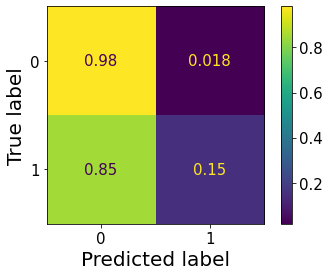

In [87]:
# Make the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_clf, preds, normalize='true')
plt.show()

## Anne First Logistic Model



In [88]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Attrition')
y = df['Attrition']

train_df, test_df = train_test_split(df, test_size=0.3)

X_train = train_df.drop(columns='Attrition')
y_train = train_df['Attrition']
X_test = test_df.drop(columns='Attrition')
y_test = test_df['Attrition']

Confusion Matrix:
[[0.99590024 0.00409976]
 [0.91516245 0.08483755]]
Accuracy = 0.8509049123814996
AUROC = 0.7227749485371476
TNR: 0.9959002391527161
TPR: 0.08483754512635379
FPR: 0.004099760847283909
FNR: 0.9151624548736462


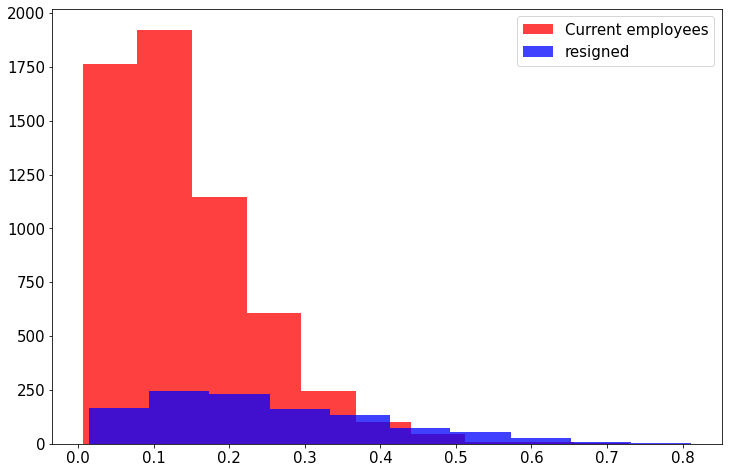

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

logr = LogisticRegression(max_iter=30000)

logr.fit(X_train, y_train)

preds = logr.predict(X_test)
logr_proba_preds = logr.predict_proba(X_test)[:, 1]
test_df['logr_proba_preds'] = logr.predict_proba(X_test)[:, 1]
cm = confusion_matrix(y_test, preds, normalize='true')
print(f'Confusion Matrix:')
print(cm)
dfacc = sum(y_test == preds) / len(y_test)
print(f'Accuracy = {dfacc}')
auroc = roc_auc_score(y_test, logr_proba_preds)
print(f'AUROC = {auroc}')
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
tpr = TP/(TP+FN)
tnr = TN/(TN+FP) 
fpr = FP/(FP+TN)
fnr = FN/(TP+FN)
print(f'TNR: {tnr}')
print(f'TPR: {tpr}')
print(f'FPR: {fpr}')
print(f'FNR: {fnr}')

plt.figure(figsize=(12, 8))
plt.hist(test_df[test_df['Attrition'] == 0]['logr_proba_preds'], color='red', label='Current employees', alpha=0.75)
plt.hist(test_df[test_df['Attrition'] == 1]['logr_proba_preds'], color='blue', label='resigned', alpha=0.75)
plt.legend()

# Balancing Attrition



In [90]:
#take df and balance by attrition
def balanceDf(dfToBalance):
  rows = dfToBalance[(dfToBalance['Attrition'] == 1)].shape[0]
  dfResigned = dfToBalance[(dfToBalance['Attrition'] == 1)]
  dfCurrent = dfToBalance[(dfToBalance['Attrition'] == 0 )]
  dfCurrent = dfCurrent.sample(n = rows)

  assert dfResigned.shape[0] == dfCurrent.shape[0]

  dfBalanced = pd.concat([dfResigned, dfCurrent], axis=0)
  return dfBalanced

## Logistic Model after Balancing Attrition



Confusion Matrix:
[[0.67148014 0.32851986]
 [0.32761733 0.67238267]]
Accuracy = 0.6719314079422383
AUROC = 0.7367765121401295
TNR: 0.6714801444043321
TPR: 0.6723826714801444
FPR: 0.3285198555956679
FNR: 0.3276173285198556
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      1108
           1       0.67      0.67      0.67      1108

    accuracy                           0.67      2216
   macro avg       0.67      0.67      0.67      2216
weighted avg       0.67      0.67      0.67      2216



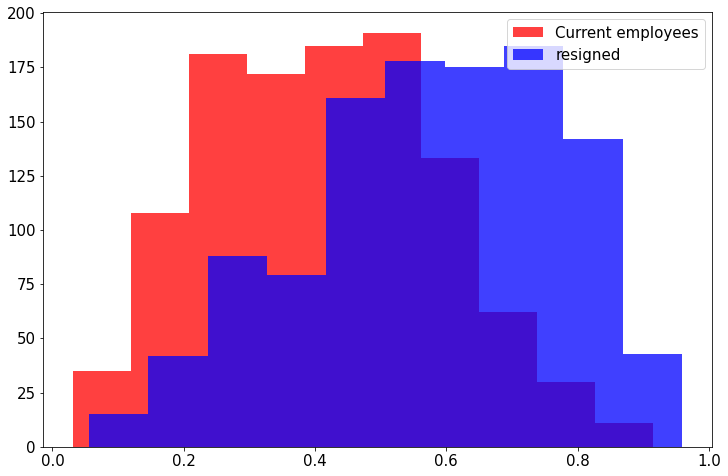

In [91]:
#balance df
train_df_blanced = balanceDf(train_df)
test_df_blanced = balanceDf(test_df)
test_df_blanced = test_df_blanced.drop(columns='logr_proba_preds')

#Set X y 
X_train = train_df_blanced.drop(columns='Attrition')
y_train = train_df_blanced['Attrition']
X_test = test_df_blanced.drop(columns='Attrition')
y_test = test_df_blanced['Attrition']

#Logistic regression
logr = LogisticRegression(max_iter=30000)
logr.fit(X_train, y_train)
preds = logr.predict(X_test)
test_df_blanced['logr_proba_preds'] = logr.predict_proba(X_test)[:, 1]
logr_proba_preds = logr.predict_proba(X_test)[:, 1]
# Model Analysis
cm = confusion_matrix(y_test, preds, normalize='true')
print(f'Confusion Matrix:')
print(cm)
dfacc = sum(y_test == preds) / len(y_test)
print(f'Accuracy = {dfacc}')
auroc = roc_auc_score(y_test, logr_proba_preds)
print(f'AUROC = {auroc}')
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
tpr = TP/(TP+FN)
tnr = TN/(TN+FP) 
fpr = FP/(FP+TN)
fnr = FN/(TP+FN)
print(f'TNR: {tnr}')
print(f'TPR: {tpr}')
print(f'FPR: {fpr}')
print(f'FNR: {fnr}')

plt.figure(figsize=(12, 8))
plt.hist(test_df_blanced[test_df_blanced['Attrition'] == 0]['logr_proba_preds'], color='red', label='Current employees', alpha=0.75)
plt.hist(test_df_blanced[test_df_blanced['Attrition'] == 1]['logr_proba_preds'], color='blue', label='resigned', alpha=0.75)
plt.legend()

print(classification_report(y_test, preds))

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60],
 [Text(0, 0, 'Age'),
  Text(1, 0, 'DailyRate'),
  Text(2, 0, 'DistanceFromHome'),
  Text(3, 0, 'Education'),
  Text(4, 0, 'EnvironmentSatisfaction'),
  Text(5, 0, 'Gender'),
  Text(6, 0, 'HourlyRate'),
  Text(7, 0, 'JobInvolvement'),
  Text(8, 0, 'JobLevel'),
  Text(9, 0, 'JobSatisfaction'),
  Text(10, 0, 'MonthlyIncome'),
  Text(11, 0, 'MonthlyRate'),
  Text(12, 0, 'NumCompaniesWorked'),
  Text(13, 0, 'OverTime'),
  Text(14, 0, 'PercentSalaryHike'),
  Text(15, 0, 'PerformanceRating'),
  Text(16, 0, 'RelationshipSatisfaction'),
  Text(17, 0, 'StandardHours'),
  Text(18, 0, 'StockOptionLevel'),
  Text(19, 0, 'TotalWorkingYears'),
  Text

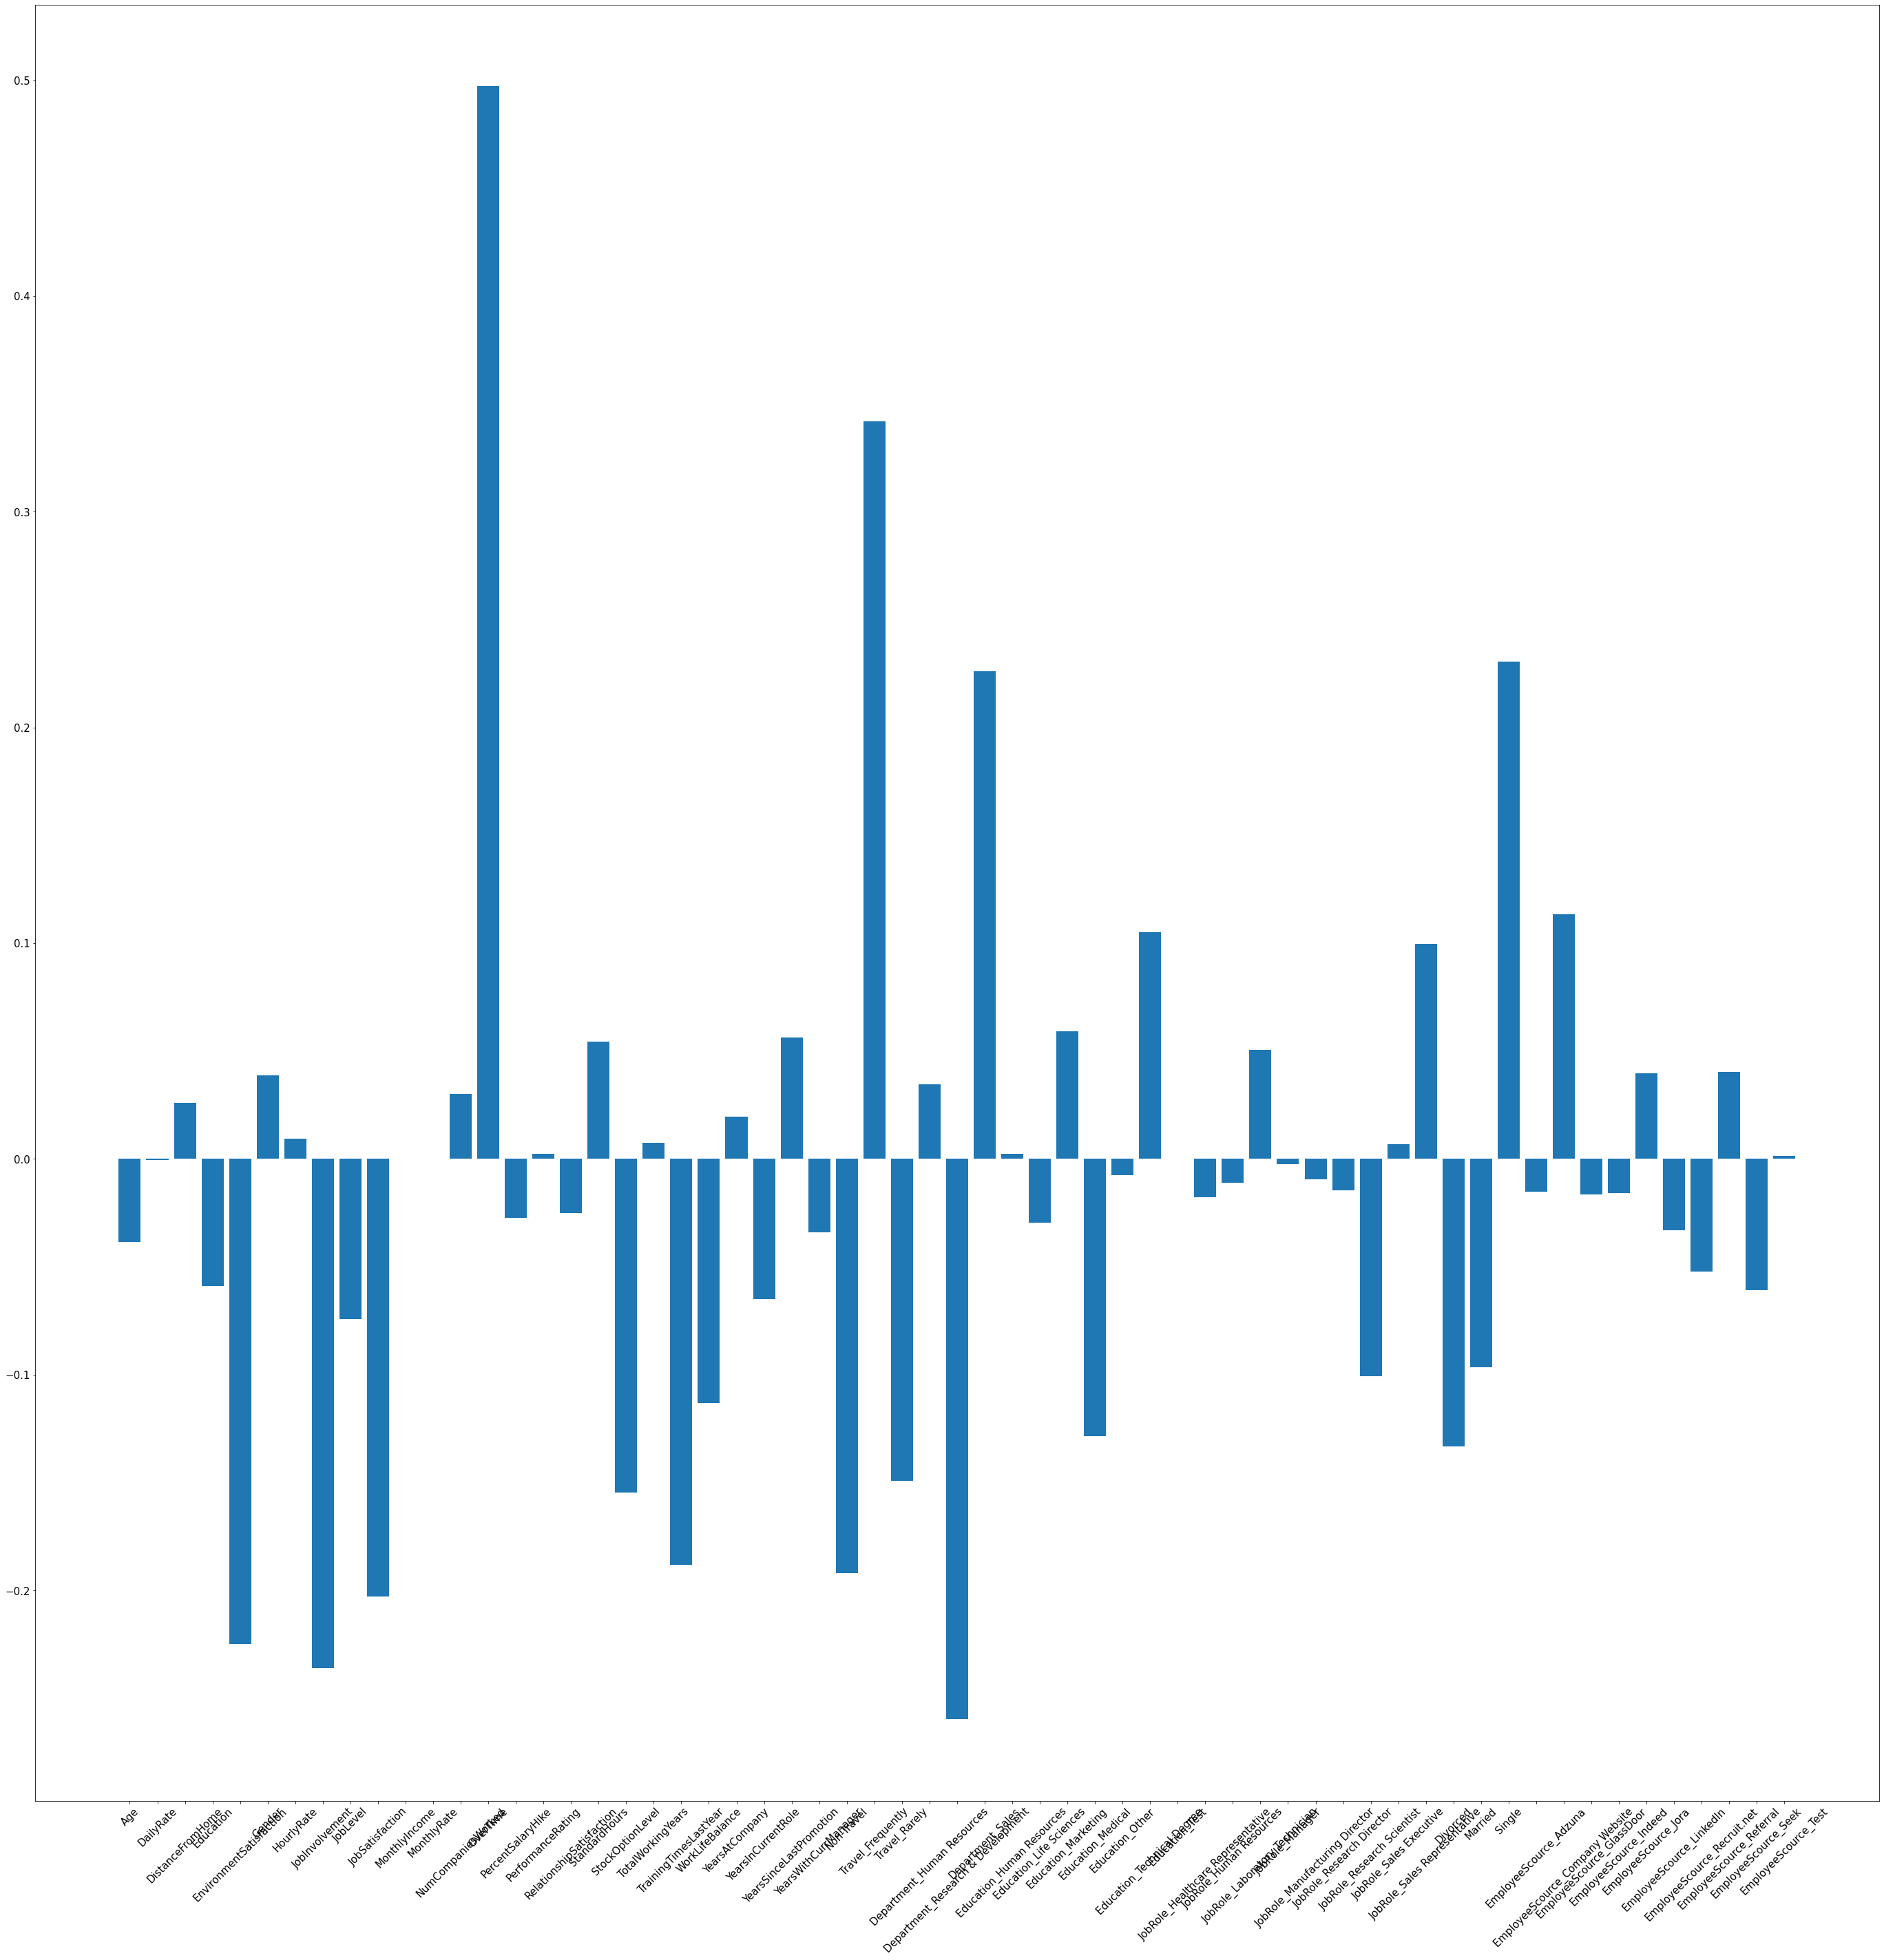

In [92]:
plt.figure(figsize=(48, 48))
plt.bar(x=X.columns, height=logr.coef_[0]) # The zero is needed because the coefficients are an array of arrays.
plt.xticks(rotation=45) # Rotate the labels so you can read them

# Investigating job roles

In [93]:
filter_col = [col for col in df if col.startswith('JobRole')]
filter_col

for col in filter_col:
  print(col)

JobRole_Healthcare Representative
JobRole_Human Resources
JobRole_Laboratory Technician
JobRole_Manager
JobRole_Manufacturing Director
JobRole_Research Director
JobRole_Research Scientist
JobRole_Sales Executive
JobRole_Sales Representative


In [94]:
dfLeft = df[(df['Attrition'] == 1)]
dfStayed = df[(df['Attrition'] == 0)]

filter_col = [col for col in df if col.startswith('JobRole')]

for col in filter_col:
  left = df[(df[col] == 1) & (df['Attrition'] == 1)].shape[0] / df[(df[col] == 1)].shape[0]
  print(f'% of {col} who left: {left*100:.2f}')

% of JobRole_Healthcare Representative who left: 13.96
% of JobRole_Human Resources who left: 17.66
% of JobRole_Laboratory Technician who left: 18.31
% of JobRole_Manager who left: 8.71
% of JobRole_Manufacturing Director who left: 12.20
% of JobRole_Research Director who left: 9.68
% of JobRole_Research Scientist who left: 16.11
% of JobRole_Sales Executive who left: 16.39
% of JobRole_Sales Representative who left: 28.02


## Investigating Job level

In [95]:
filter_col = df['JobLevel'].unique()

for col in filter_col:
  left = df[(df['JobLevel'] == col) & (df['Attrition'] == 1)].shape[0] / df[(df['JobLevel'] == col)].shape[0]
  print(f'% of {col} who left: {left*100:.2f}')

% of 2.0 who left: 12.79
% of 4.0 who left: 12.84
% of 5.0 who left: 8.22
% of 1.0 who left: 20.61
% of 3.0 who left: 15.30


## Investigating Job level and Pay

## Combining sales representative and joblevel

In [96]:
filter_col = df['JobLevel'].unique()

for col in filter_col:
  left = df[(df['JobLevel'] == col) & (df['JobRole_Sales Representative'] == 1)].shape[0] / df[(df['JobRole_Sales Representative'] == 1)].shape[0]
  print(f'% of Job level {col} in sales rep: {left*100:.2f}')

% of Job level 2.0 in sales rep: 8.93
% of Job level 4.0 in sales rep: 0.00
% of Job level 5.0 in sales rep: 0.00
% of Job level 1.0 in sales rep: 90.76
% of Job level 3.0 in sales rep: 0.31


In [97]:
filter_col = df['JobLevel'].unique()

for col in filter_col:
  left_total = df[(df['JobRole_Sales Representative'] == 1) & (df['Attrition'] == 1)].shape[0]
  if left_total > 0 :
    left = df[(df['JobLevel'] == col) & (df['JobRole_Sales Representative'] == 1) & (df['Attrition'] == 1)].shape[0] / df[(df['JobRole_Sales Representative'] == 1) & (df['Attrition'] == 1)].shape[0]
    print(f'Amongst all the sales rep who quit, {left*100:.2f}% had a job level of {col} ')

Amongst all the sales rep who quit, 3.85% had a job level of 2.0 
Amongst all the sales rep who quit, 0.00% had a job level of 4.0 
Amongst all the sales rep who quit, 0.00% had a job level of 5.0 
Amongst all the sales rep who quit, 96.15% had a job level of 1.0 
Amongst all the sales rep who quit, 0.00% had a job level of 3.0 


## Combining high attrition job role with job level and looking at attrition for these micro-categories

In [98]:
def combiningJLandJR():
  dfLeft = df[(df['Attrition'] == 1)]

  filter_col = [col for col in df if col.startswith('JobRole')]

  for jobrole in filter_col:
    left = df[(df[jobrole] == 1) & (df['Attrition'] == 1)].shape[0] / df[(df[jobrole] == 1)].shape[0]
    if left > 0.12:
      filter_col_JL = df['JobLevel'].unique()
      for jl in filter_col_JL:
        left_total = df[(df[jobrole] == 1) & (df['Attrition'] == 1)].shape[0]
        if left_total > 0 :
          left_jr_jl = df[(df['JobLevel'] == jl) & (df[jobrole] == 1) & (df['Attrition'] == 1)].shape[0] / left_total
          if left_jr_jl >= 0.5:
            print(f'Amongst all the {jobrole} who quit, {left_jr_jl*100:.2f}% had a job level of {jl}')

In [99]:
combiningJLandJR()

Amongst all the JobRole_Healthcare Representative who quit, 55.86% had a job level of 2.0
Amongst all the JobRole_Human Resources who quit, 75.68% had a job level of 1.0
Amongst all the JobRole_Laboratory Technician who quit, 85.64% had a job level of 1.0
Amongst all the JobRole_Manufacturing Director who quit, 50.35% had a job level of 2.0
Amongst all the JobRole_Research Scientist who quit, 87.57% had a job level of 1.0
Amongst all the JobRole_Sales Executive who quit, 66.75% had a job level of 2.0
Amongst all the JobRole_Sales Representative who quit, 96.15% had a job level of 1.0


In [100]:
X_test.duplicated().sum() / len(X_test)

0.17012635379061372

In [101]:
df = df.drop_duplicates()

# Combining high attrition role and job level

In [102]:
dfCombinedBalanced = df
conditions = [((dfCombinedBalanced['JobLevel'] == 2.0) & (dfCombinedBalanced['JobRole_Healthcare Representative'] == 1)),
              ((dfCombinedBalanced['JobLevel'] == 1.0) & (dfCombinedBalanced['JobRole_Human Resources'] == 1)),
              ((dfCombinedBalanced['JobLevel'] == 1.0) & (dfCombinedBalanced['JobRole_Laboratory Technician'] == 1)) ,
              ((dfCombinedBalanced['JobLevel'] == 2.0) & (dfCombinedBalanced['JobRole_Manufacturing Director'] == 1)) ,
              ((dfCombinedBalanced['JobLevel'] == 1.0) & (dfCombinedBalanced['JobRole_Research Scientist'] == 1)),
              ((dfCombinedBalanced['JobLevel'] == 2.0) & (dfCombinedBalanced['JobRole_Sales Executive'] == 1)),
              ((dfCombinedBalanced['JobLevel'] == 1.0) & (dfCombinedBalanced['JobRole_Sales Representative'] == 1))]
returnval = [1,1,1,1,1,1,1]
dfCombinedBalanced['hasHighAttri_JR&JL'] = np.select(conditions, returnval)
df[dfCombinedBalanced['Attrition'] == 1 ].shape[0] / df[dfCombinedBalanced['hasHighAttri_JR&JL'] == 1 ].shape[0] 

<ipython-input-102-d97878808eb0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCombinedBalanced['hasHighAttri_JR&JL'] = np.select(conditions, returnval)


0.2545188972064999

## Combining factors

In [103]:

dfCombinedBalanced['hasLowJobLevel'] = np.where(dfCombinedBalanced['JobLevel'] < 3, 1, 0)
dfCombinedBalanced['isYoung'] = np.where(dfCombinedBalanced['Age'] < 39, 1, 0)
dfCombinedBalanced['hasLowStockOptionLevel'] = np.where(dfCombinedBalanced['StockOptionLevel'] < 0.5, 1, 0)
dfCombinedBalanced['hasLowYearsInCurrRole'] = np.where(dfCombinedBalanced['YearsInCurrentRole'] < 2, 1, 0)
dfCombinedBalanced['hasHighDistFromHome'] = np.where(dfCombinedBalanced['DistanceFromHome'] > 10, 1, 0)
dfCombinedBalanced['sumOfBool'] = dfCombinedBalanced[['hasLowJobLevel',  'isYoung','hasLowStockOptionLevel', 'hasLowYearsInCurrRole','hasHighDistFromHome']].sum(axis=1)
dfCombinedBalanced.drop(columns = ['hasLowJobLevel', 'isYoung', 'hasLowStockOptionLevel', 'hasLowYearsInCurrRole','hasHighDistFromHome'])
dfCombinedBalanced.drop(columns = ['JobLevel', 'Age', 'StockOptionLevel', 'YearsInCurrentRole','DistanceFromHome'])

dfCombinedBalanced.head()

<ipython-input-103-22170171ddff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCombinedBalanced['hasLowJobLevel'] = np.where(dfCombinedBalanced['JobLevel'] < 3, 1, 0)
<ipython-input-103-22170171ddff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCombinedBalanced['isYoung'] = np.where(dfCombinedBalanced['Age'] < 39, 1, 0)
<ipython-input-103-22170171ddff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,EmployeeScource_Referral,EmployeeScource_Seek,EmployeeScource_Test,hasHighAttri_JR&JL,hasLowJobLevel,isYoung,hasLowStockOptionLevel,hasLowYearsInCurrRole,hasHighDistFromHome,sumOfBool
0,41.0,1,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,...,1,0,0,1,1,0,1,0,0,2
1,41.0,1,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,...,1,0,0,1,1,0,1,0,0,2
5,41.0,1,1102.0,1.0,2.0,4.0,0,33,3.0,4.0,...,0,0,0,0,0,0,0,1,0,1
6,41.0,1,1102.0,1.0,2.0,1.0,0,41,3.0,5.0,...,0,0,0,0,0,0,1,0,0,1
13,41.0,1,1102.0,1.0,2.0,1.0,1,39,3.0,2.0,...,0,0,0,1,1,0,0,0,0,1


### Trying logistic regression with: split & balanced data, and new boolean column

Confusion Matrix:
[[0.72881356 0.27118644]
 [0.27602906 0.72397094]]
Accuracy = 0.7263922518159807
AUROC = 0.7875463888514325
TNR: 0.7288135593220338
TPR: 0.7239709443099274
FPR: 0.2711864406779661
FNR: 0.27602905569007263
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       413
           1       0.73      0.72      0.73       413

    accuracy                           0.73       826
   macro avg       0.73      0.73      0.73       826
weighted avg       0.73      0.73      0.73       826



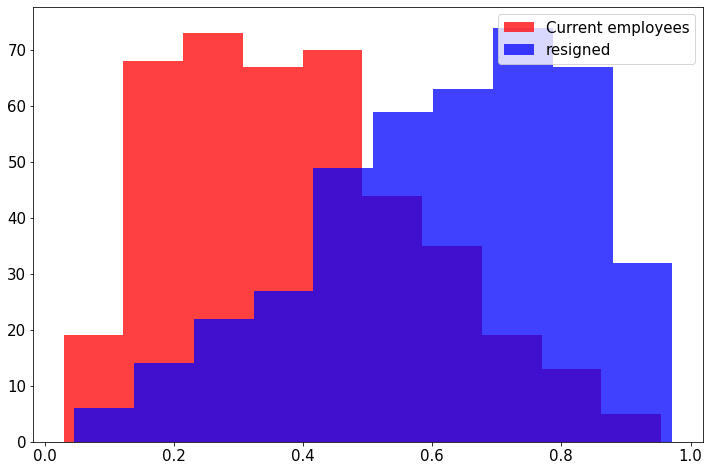

In [104]:
train_df_blanced_bool, test_df_blanced_bool = train_test_split(dfCombinedBalanced, test_size=0.3)

#balance df
train_df_blanced_bool = balanceDf(train_df_blanced_bool)
test_df_blanced_bool = balanceDf(test_df_blanced_bool)

#Set X y 
X_train_blanced_bool = train_df_blanced_bool.drop(columns='Attrition')
y_train_blanced_bool = train_df_blanced_bool['Attrition']
X_test_blanced_bool = test_df_blanced_bool.drop(columns='Attrition')
y_test_blanced_bool = test_df_blanced_bool['Attrition']

#Logistic regression
logr2 = LogisticRegression(max_iter=30000)
logr2.fit(X_train_blanced_bool, y_train_blanced_bool)
preds = logr2.predict(X_test_blanced_bool)
test_df_blanced_bool['logr_proba_preds'] = logr2.predict_proba(X_test_blanced_bool)[:, 1]
logr_proba_preds = logr2.predict_proba(X_test_blanced_bool)[:, 1]
# Model Analysis
cm = confusion_matrix(y_test_blanced_bool, preds, normalize='true')
print(f'Confusion Matrix:')
print(cm)
dfacc = sum(y_test_blanced_bool == preds) / len(y_test_blanced_bool)
print(f'Accuracy = {dfacc}')
auroc = roc_auc_score(y_test_blanced_bool, logr_proba_preds)
print(f'AUROC = {auroc}')
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
tpr = TP/(TP+FN)
tnr = TN/(TN+FP) 
fpr = FP/(FP+TN)
fnr = FN/(TP+FN)
print(f'TNR: {tnr}')
print(f'TPR: {tpr}')
print(f'FPR: {fpr}')
print(f'FNR: {fnr}')

plt.figure(figsize=(12, 8))
plt.hist(test_df_blanced_bool[test_df_blanced_bool['Attrition'] == 0]['logr_proba_preds'], color='red', label='Current employees', alpha=0.75)
plt.hist(test_df_blanced_bool[test_df_blanced_bool['Attrition'] == 1]['logr_proba_preds'], color='blue', label='resigned', alpha=0.75)
plt.legend()

print(classification_report(y_test_blanced_bool, preds))

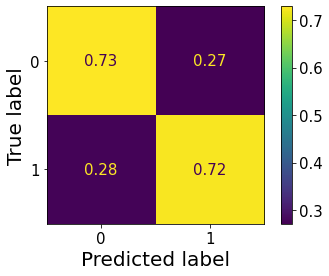

In [105]:
# Make the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_blanced_bool, preds, normalize='true')
plt.show()

# Create dataframes by Job Role

In [106]:
# Take dataframe 'dfCobinedBalanced'  and split it into spereate columns depending on job role
dfhealthcareRep = dfCombinedBalanced[dfCombinedBalanced['JobRole_Healthcare Representative'] == 1]
dfhumanRes = dfCombinedBalanced[dfCombinedBalanced['JobRole_Human Resources'] == 1]
dfmanager = dfCombinedBalanced[dfCombinedBalanced['JobRole_Manager'] == 1]
dfLabTech = dfCombinedBalanced[dfCombinedBalanced['JobRole_Laboratory Technician'] == 1]
dfManufactDir = dfCombinedBalanced[dfCombinedBalanced['JobRole_Manufacturing Director'] == 1]
dfResearchDir = dfCombinedBalanced[dfCombinedBalanced['JobRole_Research Director'] == 1]
dfRsearchSci = dfCombinedBalanced[dfCombinedBalanced['JobRole_Research Scientist'] == 1]
dfSaleEx = dfCombinedBalanced[dfCombinedBalanced['JobRole_Sales Executive'] == 1]
dfSalesRep = dfCombinedBalanced[dfCombinedBalanced['JobRole_Sales Representative'] == 1]

In [107]:
print('Row count is:', len(dfhealthcareRep.axes[0]))
print('Row count is:', len(dfhumanRes.axes[0]))

Row count is: 736
Row count is: 316


In [108]:
dfhumanRes.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,EmployeeScource_Referral,EmployeeScource_Seek,EmployeeScource_Test,hasHighAttri_JR&JL,hasLowJobLevel,isYoung,hasLowStockOptionLevel,hasLowYearsInCurrRole,hasHighDistFromHome,sumOfBool
344,41.0,0,548.0,9.0,4.0,2.0,0,61,4.0,2.0,...,0,0,0,0,1,0,0,0,0,1
345,41.0,0,548.0,9.0,4.0,2.0,0,61,4.0,2.0,...,0,0,0,0,1,0,0,0,0,1
346,41.0,0,548.0,9.0,4.0,2.0,0,61,4.0,2.0,...,0,0,0,0,1,0,0,0,0,1
567,41.0,0,552.0,4.0,3.0,3.0,1,60,1.0,2.0,...,0,1,0,0,1,0,0,0,0,1
568,41.0,0,552.0,4.0,3.0,3.0,1,60,1.0,2.0,...,0,1,0,0,1,0,0,0,0,1


#Decision Tree Model



In [109]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [110]:
dt_clf = DecisionTreeClassifier(max_depth=5,
                                min_samples_split=10,
                                min_samples_leaf=5)

In [111]:
dt_clf.fit(X_train_blanced_bool, y_train_blanced_bool)

dt_preds = dt_clf.predict(X_test_blanced_bool)

In [112]:
confusion_matrix(y_test_blanced_bool, dt_preds, normalize='true')

array([[0.73365617, 0.26634383],
       [0.37046005, 0.62953995]])

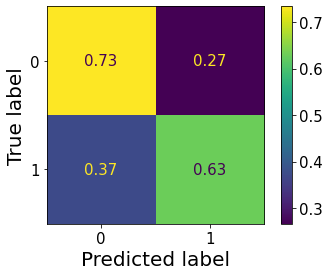

In [113]:
# Make the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_blanced_bool, dt_preds, normalize='true')
plt.show()

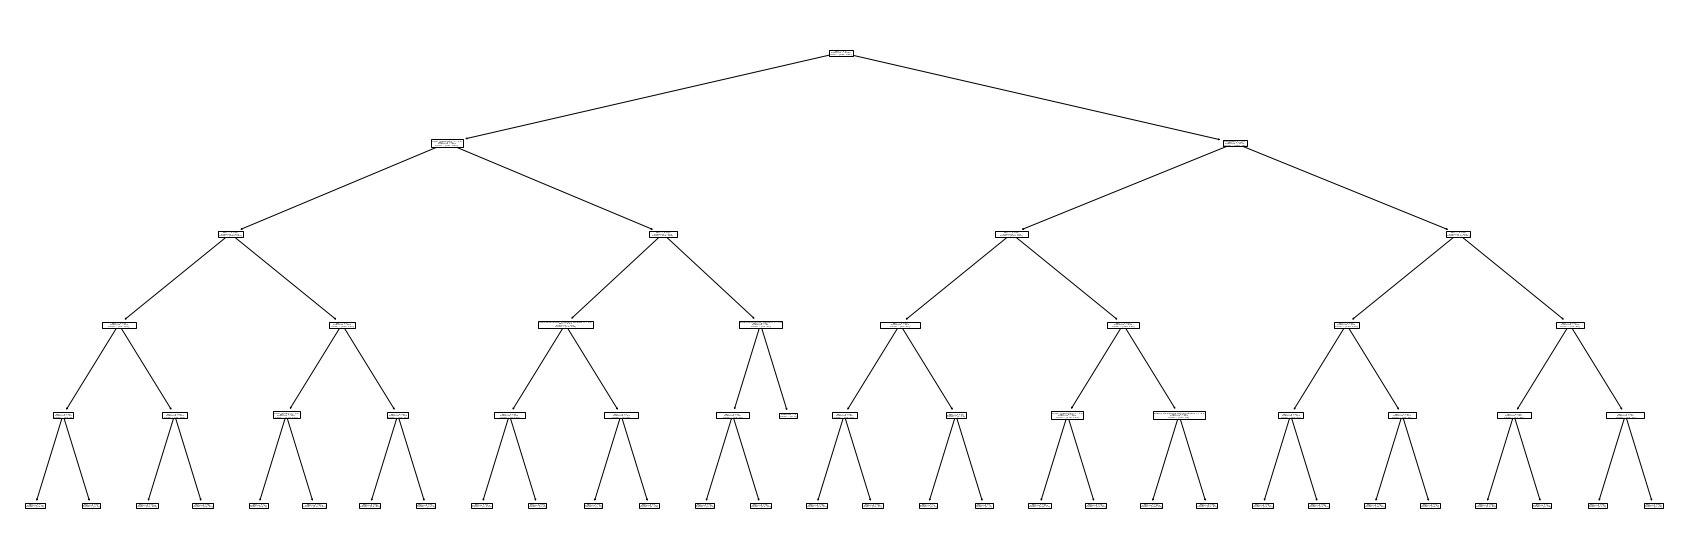

In [114]:
plt.figure(figsize=(30, 10))
plot_tree(dt_clf, feature_names=X_test_blanced_bool.columns);

## Hyperparameter Tuning the Decision Tree Model

- First Tuning Outcome {'max_depth': 50, 'min_samples_split': 5, 'min_samples_leaf': 2} Acc = 0.9435483870967742
- Second Tuning Outcome  Acc = 0.9551971326164874

In [115]:
max_depth = [25, 30, 35, 45, 50, 55, 60, 65, 70, 75]
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
min_samples_leaf = [2, 5, 10, 15, 20]

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
acc_list = []
params_list = []

for md in max_depth:
  for mss in min_samples_split:
    for msl in min_samples_leaf:
      # Fit a model using these hyperparameters
      dt_clf = DecisionTreeClassifier(max_depth=md,
                                      min_samples_split=mss,
                                      min_samples_leaf=msl)
      dt_clf.fit(X_train_blanced_bool, y_train_blanced_bool)
      
      # Make predictions on the test set
      dt_preds = dt_clf.predict(X_test_blanced_bool)

      # Compute accuracy on the test set
      acc = accuracy_score(y_test_blanced_bool, dt_preds)

      acc_list.append(acc)
      params_list.append({'max_depth': md,
                          'min_samples_split': mss,
                          'min_samples_leaf': msl})

In [118]:
max(acc_list)

0.8135593220338984

In [119]:
np.where(acc_list == max(acc_list))

(array([95]),)

In [120]:
params_list[55]

{'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 2}

In [121]:
# Immport GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

In [122]:
# Hyperparamaters for gridsearch
hyperparam_grid = {'min_samples_split': [2, 5, 10, 25, 50],
                  'max_depth': [5, 10, 25, 50, 60, 70, 80, 90, 100],
                  'min_samples_leaf': [5, 10, 25, 50, 60, 70, 80, 90, 100]}

In [123]:
dt_clf = DecisionTreeClassifier()

In [124]:
grid_search_dtc = grid_search = GridSearchCV(dt_clf, hyperparam_grid, n_jobs=-1)
dtc_acc = max(acc_list)

In [125]:
# This may take a while, go grab a coffee...
grid_search_dtc.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 25, 50, 60, 70, 80, 90, 100],
                         'min_samples_leaf': [5, 10, 25, 50, 60, 70, 80, 90,
                                              100],
                         'min_samples_split': [2, 5, 10, 25, 50]})

In [126]:
# From gridsearch find out what are the best paramaters
grid_search_dtc.best_params_

{'max_depth': 70, 'min_samples_leaf': 5, 'min_samples_split': 2}

## New Decision Tree based off Hyperparameter Tuning



In [127]:
dt_clf = DecisionTreeClassifier(max_depth=30,
                                min_samples_split=5,
                                min_samples_leaf=2)

In [128]:
dt_clf.fit(X_train_blanced_bool, y_train_blanced_bool)

dt_preds = dt_clf.predict(X_test_blanced_bool)

In [129]:
confusion_matrix(y_test_blanced_bool, dt_preds, normalize='true')

array([[0.75786925, 0.24213075],
       [0.1622276 , 0.8377724 ]])

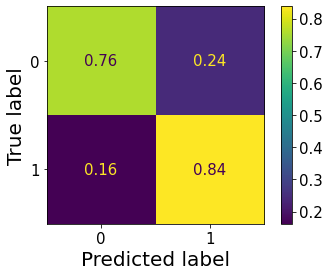

In [130]:
# Make the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_blanced_bool, dt_preds, normalize='true')
plt.show()

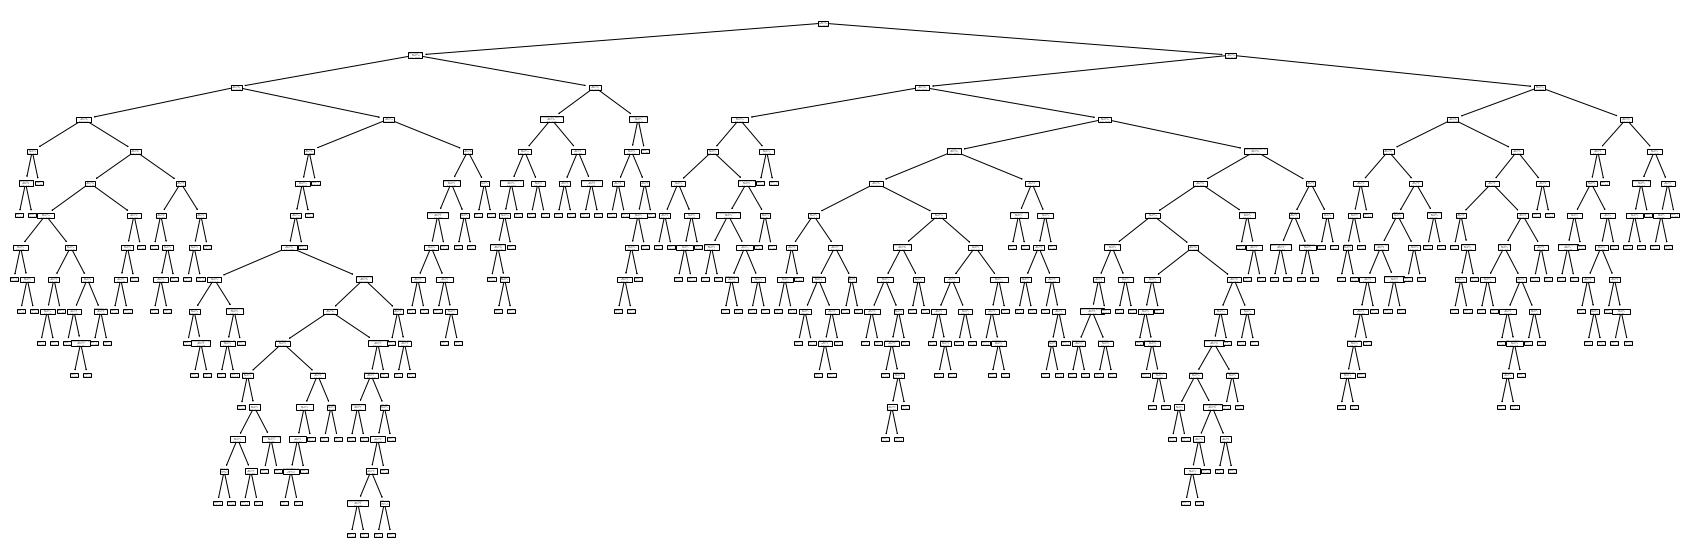

In [131]:
plt.figure(figsize=(30, 10))
plot_tree(dt_clf, feature_names=X_test_blanced_bool.columns);

In [132]:
dfCombinedBalanced.iloc[:, 1]

0        1
1        1
5        1
6        1
13       1
        ..
23420    0
23425    0
23426    0
23427    0
23428    0
Name: Attrition, Length: 8448, dtype: int64

In [133]:
n_nodes = dt_clf.tree_.node_count
children_left = dt_clf.tree_.children_left
children_right = dt_clf.tree_.children_right
feature = dt_clf.tree_.feature
threshold = dt_clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 441 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 0] <= 31.5 else to node 176.
	node=1 is a split node: go to node 2 if X[:, 27] <= 0.5 else to node 139.
		node=2 is a split node: go to node 3 if X[:, 1] <= 505.0 else to node 52.
			node=3 is a split node: go to node 4 if X[:, 2] <= 1.5 else to node 9.
				node=4 is a split node: go to node 5 if X[:, 3] <= 3.5 else to node 8.
					node=5 is a split node: go to node 6 if X[:, 31] <= 0.5 else to node 7.
						node=6 is a leaf node.
						node=7 is a leaf node.
					node=8 is a leaf node.
				node=9 is a split node: go to node 10 if X[:, 6] <= 84.5 else to node 39.
					node=10 is a split node: go to node 11 if X[:, 0] <= 29.5 else to node 32.
						node=11 is a split node: go to node 12 if X[:, 4] <= 2.5 else to node 17.
							node=12 is a split node: go to node 13 if X[:, 2] <= 24.5 else to node 14.
								node=13 is a leaf node.
								node=14 is a split node:

# Simple analysis of attrition vs continous variables

In [134]:
df.select_dtypes('float64')

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1102.0,1.0,2.0,2.0,3.0,2.0,19479.0,8.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,41.0,1102.0,1.0,2.0,2.0,3.0,2.0,19479.0,4.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
5,41.0,1102.0,1.0,2.0,4.0,3.0,4.0,19730.0,2.0,3.0,3.0,80.0,3.0,21.0,2.0,3.0,5.0,0.0,0.0,2.0
6,41.0,1102.0,1.0,2.0,1.0,3.0,5.0,3854.0,5.0,3.0,4.0,80.0,0.0,33.0,5.0,1.0,29.0,8.0,11.0,10.0
13,41.0,1102.0,1.0,2.0,1.0,3.0,2.0,21173.0,0.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,9.0,7.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23420,60.0,370.0,1.0,4.0,4.0,3.0,4.0,3498.0,1.0,3.0,2.0,80.0,2.0,27.0,2.0,3.0,4.0,2.0,1.0,2.0
23425,60.0,370.0,1.0,4.0,3.0,1.0,3.0,20467.0,3.0,3.0,3.0,80.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0
23426,60.0,370.0,1.0,4.0,3.0,1.0,3.0,20467.0,0.0,3.0,3.0,80.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0
23427,60.0,370.0,1.0,4.0,3.0,1.0,3.0,20467.0,3.0,4.0,3.0,80.0,1.0,20.0,2.0,3.0,20.0,7.0,2.0,13.0


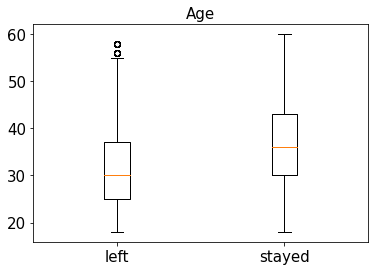

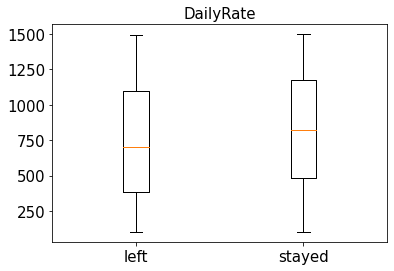

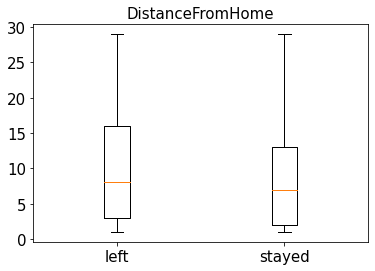

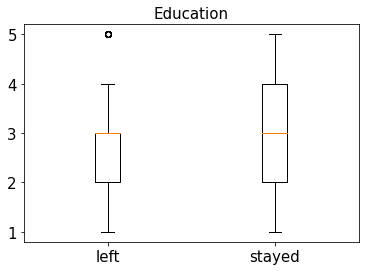

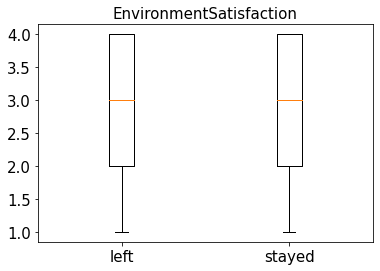

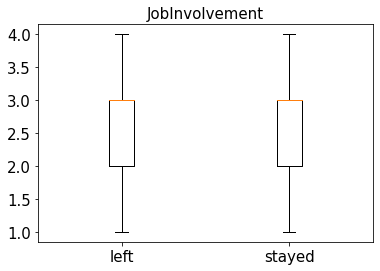

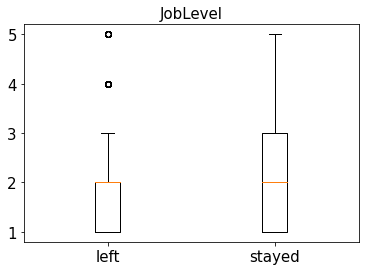

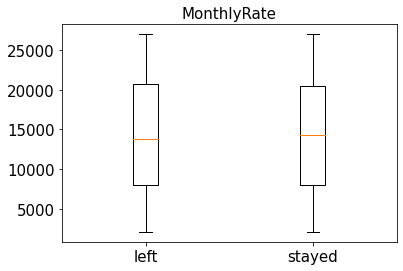

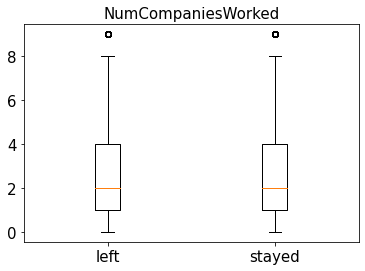

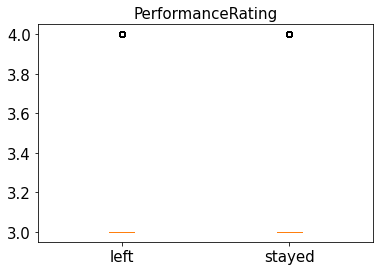

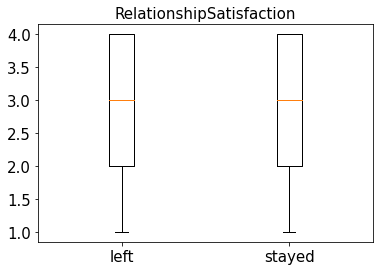

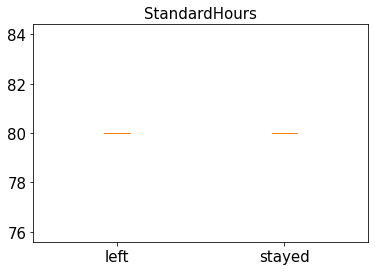

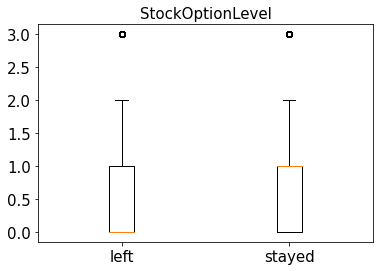

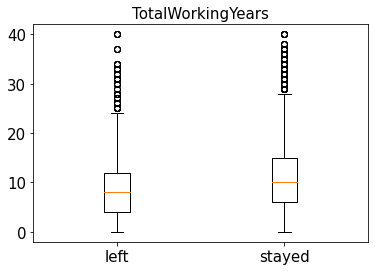

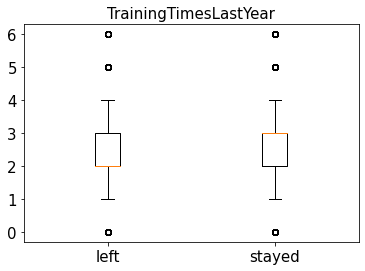

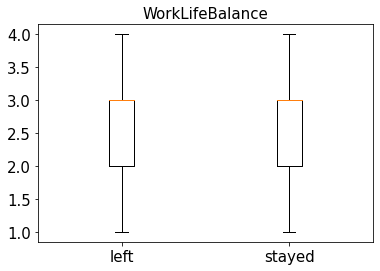

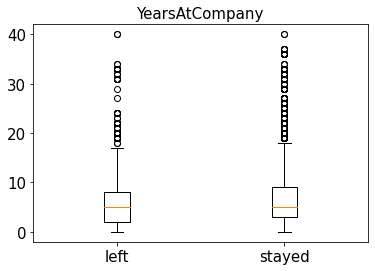

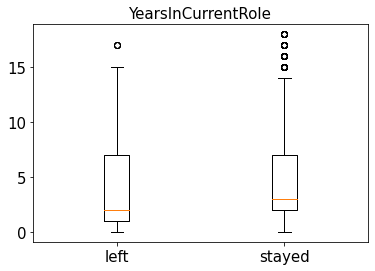

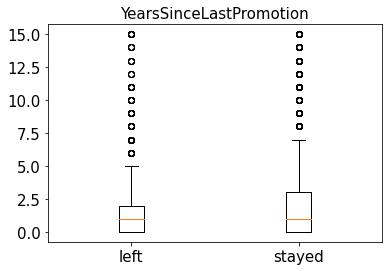

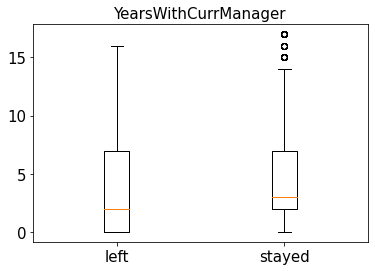

In [135]:
dfplots = df.select_dtypes('float64')

dfLeft = df[(df['Attrition'] == 1)]
dfStayed = df[(df['Attrition'] == 0)]

columnsall = list(dfplots.columns)

for col in columnsall:
  left = dfLeft[col]
  stayed = dfStayed[col]
  data = [left, stayed]
  # Multiple box plots on one Axes
  fig, ax = plt.subplots()
  ax.boxplot(data)
  ax.set_title(col)
  plt.xticks([1, 2], ['left', 'stayed'])
  plt.show()

# Simple analysis of attrition vs uint8 variables

In [136]:
dfplotsuint8 = df.select_dtypes('uint8')

dfplotsuint8.head()

,Non-Travel,Travel_Frequently,Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Human Resources,Education_Life Sciences,Education_Marketing,Education_Medical,...,EmployeeScource_Adzuna,EmployeeScource_Company Website,EmployeeScource_GlassDoor,EmployeeScource_Indeed,EmployeeScource_Jora,EmployeeScource_LinkedIn,EmployeeScource_Recruit.net,EmployeeScource_Referral,EmployeeScource_Seek,EmployeeScource_Test
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
13,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [137]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Non-Travel',
       'Travel_Frequently', 'Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'Education_Human Resources', 'Education_Life Sciences',
       'Education_Marketing', 'Education_Medical', 'Education_Other',
       'Education_Technical Degree', 'Education_Test',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician

In [138]:
continuous_cols = ['Age', 'DailyRate', 'DistanceFromHome',
       'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

categorical_cols = ['Department_Human Resources', 'Department_Research & Development', 'Education',
       'EnvironmentSatisfaction', 'Gender',  'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'EducationField_Test',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely']

def make_distance_matrix(X, continuous_cols, categorical_cols):
  # Continuous columns
  from sklearn.metrics import DistanceMetric
  euc_dist = DistanceMetric.get_metric('euclidean')
  continuous_dist = euc_dist.pairwise(X[continuous_cols])

  # Categorical columns
  hamming_dist = DistanceMetric.get_metric('hamming')
  categorical_dist = hamming_dist.pairwise(X[categorical_cols])

  # Total distance
  X_dist = continuous_dist + categorical_dist

  return(X_dist)

# Fit your nn model
# Set metric to "precomputed" to tell it to use a distance matrix
knn = KNeighborsClassifier(n_neighbors=5, metric="precomputed")
# Make sure to use the distance matrix
X_train_dist = make_distance_matrix(X_train, continuous_cols, categorical_cols)

knn.fit(X_train_dist, y_train)

# Make predictions
X_test_dist = make_distance_matrix(X_test, continuous_cols, categorical_cols)
#knn.predict(X_test_dist)

NameError: ignored

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

xgb_clf = XGBClassifier(n_estimators=100, max_depth=100, learning_rate=1e-3, n_jobs=-1)

xgb_clf.fit(X_train, y_train)

ConfusionMatrixDisplay.from_predictions(y_test, xgb_clf.predict(X_test), normalize='true')
plt.show()

In [ ]:
X_train.shape[0]

In [ ]:
X_test.shape[0]

In [ ]:
#take df and balance by attrition
def balanceDf(dfToBalance):
  rows = dfToBalance[(dfToBalance['Attrition'] == 1)].shape[0]
  dfResigned = dfToBalance[(dfToBalance['Attrition'] == 1)]
  dfCurrent = dfToBalance[(dfToBalance['Attrition'] == 0 )]
  dfCurrent = dfCurrent.sample(n = rows)

  assert dfResigned.shape[0] == dfCurrent.shape[0]

  dfBalanced = pd.concat([dfResigned, dfCurrent], axis=0)
  return dfBalanced

In [ ]:
df_balanced = balanceDf(df)

In [ ]:
balanced_train_df, balanced_test_df = train_test_split(df_balanced, train_size=0.7)

balanced_X_train = balanced_train_df.drop('Attrition', axis=1)
balanced_y_train = balanced_train_df['Attrition']

balanced_X_test = balanced_test_df.drop('Attrition', axis=1)
balanced_y_test = balanced_test_df['Attrition']

In [ ]:
xgb_clf_balanced = XGBClassifier(n_estimators=100, max_depth=100, learning_rate=1e-3, n_jobs=-1)

xgb_clf_balanced.fit(balanced_X_train, balanced_y_train)

ConfusionMatrixDisplay.from_predictions(balanced_y_test, xgb_clf_balanced.predict(balanced_X_test), normalize='true')
plt.show()